In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
###Seaborn is good for statistical analysis

In [3]:
H = pd.read_csv('house.csv')

In [34]:
H.head()

,price,assess,bdrms,lotsize,sqrft,colonial
0,300.0,349.100006,4,6126,2438,1
1,370.0,351.500000,3,9903,2076,1
2,191.0,217.699997,3,5200,1374,0
3,195.0,231.800003,3,4600,1448,1
4,373.0,319.100006,4,6095,2514,1


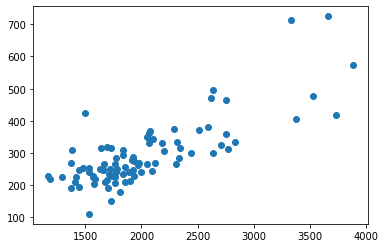

In [5]:
### look up against H table, plot sqrft and price
plt.scatter('sqrft', 'price', data = H)

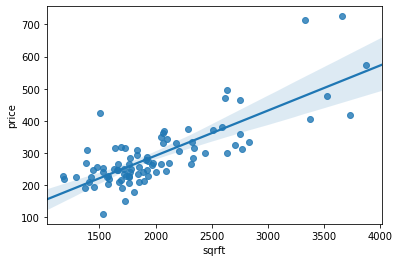

In [6]:
### with seaborn, do the same thing, you will see there is default regression line and confidence interval
sns.regplot('sqrft', 'price', data = H)

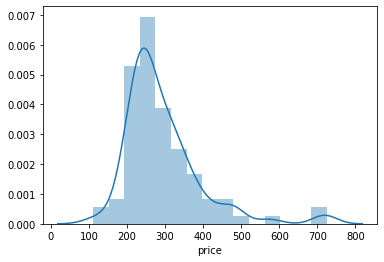

In [45]:
### seaborn has nicer looking distribution plot, however, default may not be useful
### y axis is gaussian distribution
sns.distplot(H.price, hist=True)

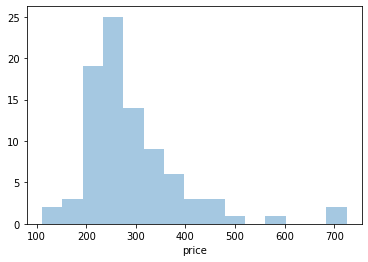

In [46]:
### actual histogram
sns.distplot(H.price, hist=True, kde=False)

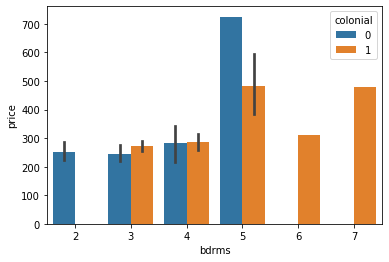

In [7]:
sns.barplot(x = 'bdrms', y='price', hue = 'colonial', data =H)
## blue bar is non colonial, orange bar is colonial, 
## black line indicates level of uncertainty
## some bars don't have uncertainty, that's because of lack of data

In [8]:
#### seaborn is good for correlations, let's plot some correlation
c = H.corr()
c

,price,assess,bdrms,lotsize,sqrft,colonial
price,1.000000,0.905279,0.508084,0.347124,0.787907,0.137946
assess,0.905279,1.000000,0.482474,0.328146,0.865634,0.082936
bdrms,0.508084,0.482474,1.000000,0.136326,0.531474,0.304575
lotsize,0.347124,0.328146,0.136326,1.000000,0.183842,0.014019
sqrft,0.787907,0.865634,0.531474,0.183842,1.000000,0.065421
colonial,0.137946,0.082936,0.304575,0.014019,0.065421,1.000000


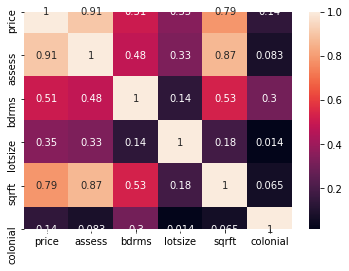

In [9]:
sns.heatmap(c, annot = True)  ##Annot to see numbers

In [10]:
## ceate a mask matrix
mask = np.ones_like(c, dtype = np.bool)
mask

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [11]:
mask = np.triu(mask) ## only have top triangle True
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

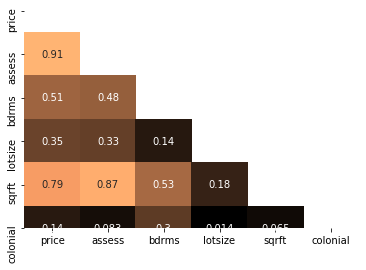

In [12]:

sns.heatmap(c, annot = True, mask = mask, cmap = 'copper', cbar=False)  ##Annot to see numbers

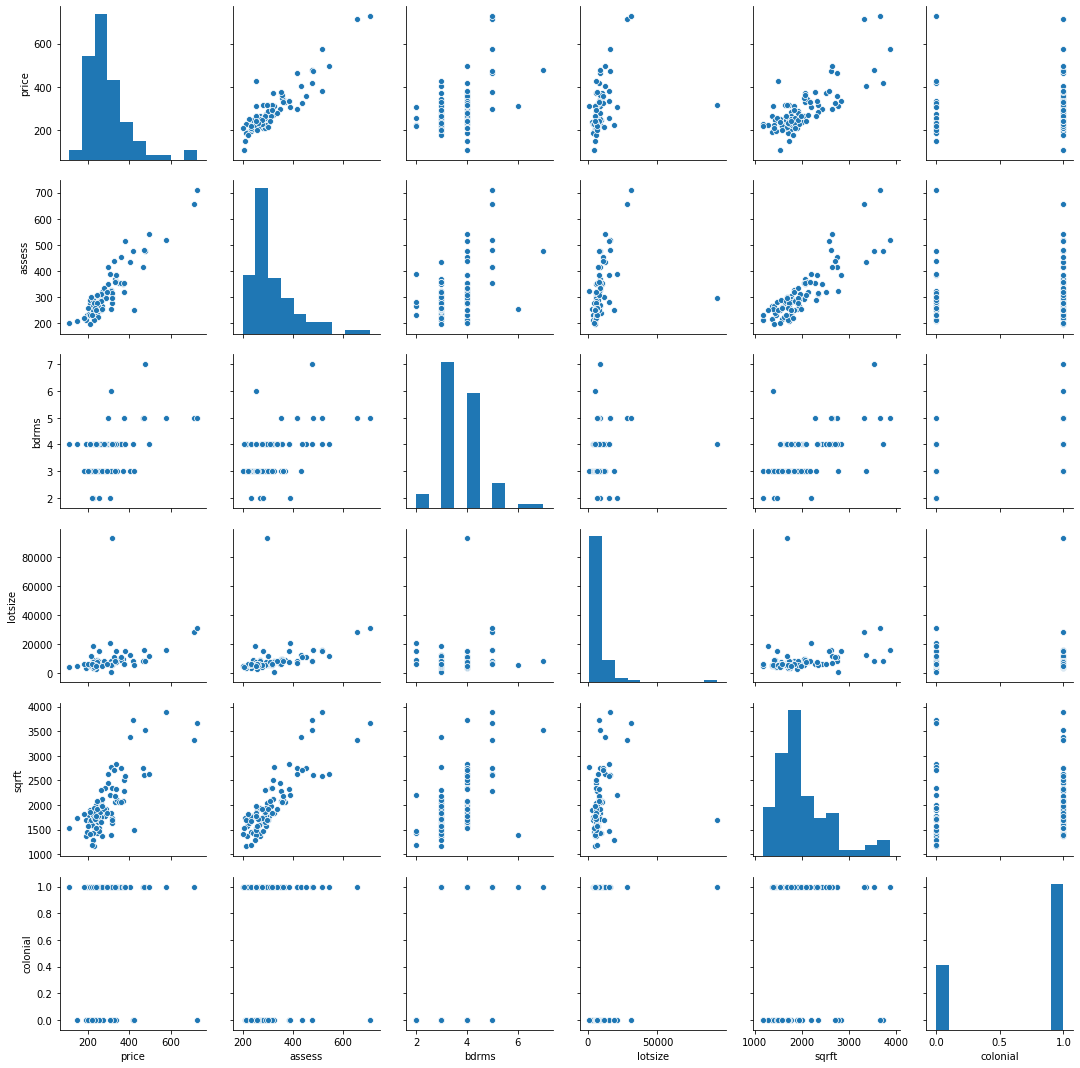

In [17]:
### plot all combinations of variables
### histogram by count for variable against self, then scatter plot for rest
sns.pairplot(H)

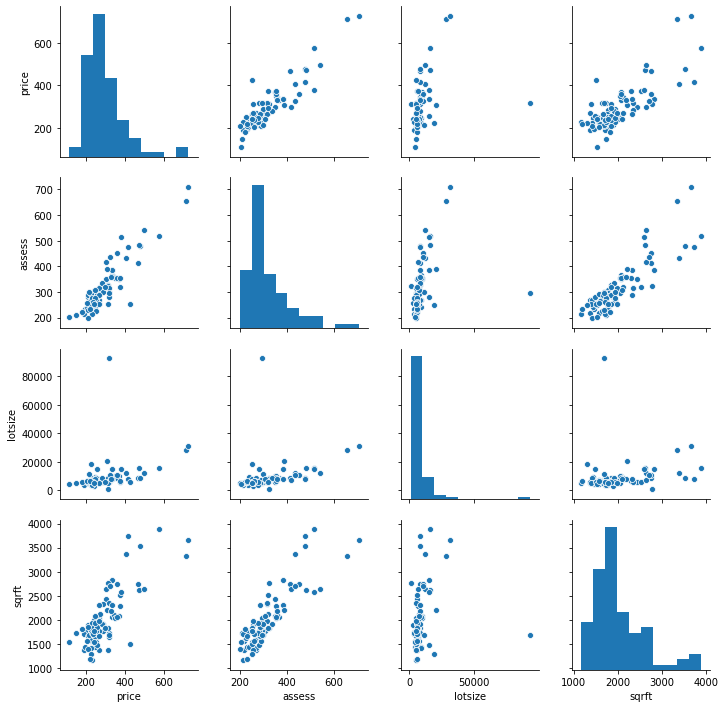

In [19]:
### show correlation on numerical values
sns.pairplot(H[['price', 'assess', 'lotsize', 'sqrft']])

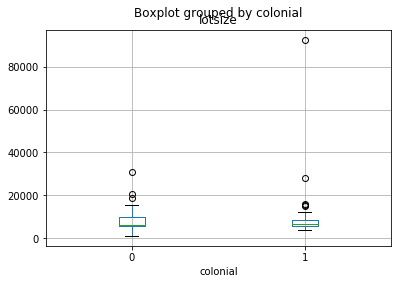

In [21]:
H.boxplot(column = 'lotsize', by='colonial')

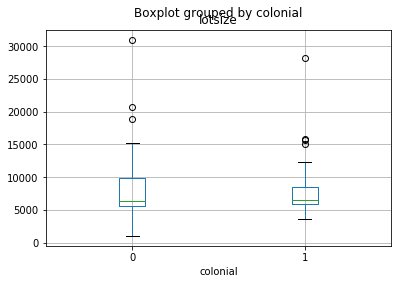

In [25]:
### default matplotlib
H2=H[H.lotsize<40000]
H2.boxplot(column = 'lotsize', by='colonial')

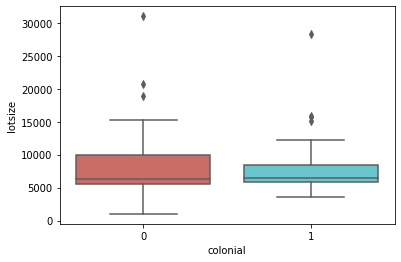

In [48]:
## use seaborn
sns.boxplot(x='colonial', y='lotsize', data=H2, palette='hls')

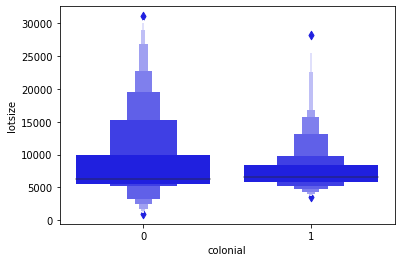

In [49]:
### Other interesting things Seaborn can do
sns.boxenplot(x='colonial', y='lotsize', data=H2, color='b')

In [ ]:
### 